# Importing Libraries

In [2]:
!pip uninstall numpy gensim

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.0.2


In [3]:
!pip install numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec, FastText
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Bidirectional, LSTM, GRU


In [3]:
# Load and Preprocess Data
data = pd.read_excel('/kaggle/input/urdu-dataset1/Proposed Dataset.xlsx')
data.dropna(inplace=True)
data.head()

,sentence,target,sents
0,اس کا تھمب نیل ویگن پورن جیسا لگتا ہے۔,0,اس کا تھمب نیل ویگن پورن جیسا لگتا
1,اس کے بال بہت اچھے ہیں اوہ ما خدا مجھے اس پر و...,0,اس بال بہت اوہ ما خدا مجھے اس واقعی فخر کاش می...
2,یہ ویڈیو کتنی پرانی ہے کیونکہ میں جانتا ہوں کہ...,0,ویڈیو کتنی پرانی کیونکہ میں جانتا آپ کسی بیکن ...
3,اگر وہ مکمل ویگن ہو رہی ہے تو وہ جانتی ہے کہ و...,0,اگر وہ مکمل ویگن وہ جانتی وہ ایسی مصنوعات استع...
4,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...,0,میرے پسندیدہ سبزی خور کھانے میں سے کچھ سوادج پ...


In [4]:
# Tokenization
tokenizer = Tokenizer()
#data['sents'] = data['no stop'].apply(lambda x: str(x).split())
tokenizer.fit_on_texts(data['sents'])
sequences = tokenizer.texts_to_sequences(data['sents'])

In [5]:
# Pad Sequences
vocab_size = len(tokenizer.word_index) + 1
maxlen = max(data['sents'].apply(len))
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [6]:
fastext = FastText(data['sents'], vector_size=100, window=3, min_count=1, workers=4, epochs=100)

In [7]:
fastext_embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    fastext_embedding_matrix[i] = fastext.wv[word] if word in fastext.wv else np.zeros(100)

In [8]:
test_data=pd.read_csv('/kaggle/input/urdu-dataset1/train.csv')
test_data.dropna(inplace=True)
test_data.head()

,id,tweet,target
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


In [9]:
stopwords = ['آئی', 'آئے', 'آج', 'آخر', 'آخرکبر', 'آدهی', 'آًب', 'آٹھ', 'آیب', 'اة', 'اخبزت', 'اختتبم',  'ادھر', 'ارد', 'اردگرد', 'ارکبى', 'اش', 'اضتعوبل', 'اضتعوبلات', 'اضطرذ', 'اضکب', 'اضکی',  'اضکے', 'اطراف', 'اغیب', 'افراد', 'الگ', 'اور', 'اوًچب', 'اوًچبئی', 'اوًچی', 'اوًچے', 'اى',  'اً', 'اًذر', 'اًہیں', 'اٹھبًب', 'اپٌب', 'اپٌے', 'اچھب', 'اچھی', 'اچھے', 'اکثر', 'اکٹھب',  'اکٹھی', 'اکٹھے', 'اکیلا', 'اکیلی', 'اکیلے', 'اگرچہ', 'اہن', 'ایطے', 'ایک', 'ب', 'ت', 'تبزٍ',  'تت', 'تر', 'ترتیت', 'تریي', 'تعذاد', 'تن', 'تو', 'توبم', 'توہی', 'توہیں', 'تٌہب', 'تک',  'تھب', 'تھوڑا', 'تھوڑی', 'تھوڑے', 'تھی', 'تھے', 'تیي', 'ثب', 'ثبئیں', 'ثبترتیت', 'ثبری', 'ثبرے',  'ثبعث', 'ثبلا', 'ثبلترتیت', 'ثبہر', 'ثدبئے', 'ثرآں', 'ثراں', 'ثرش', 'ثعذ', 'ثغیر', 'ثلٌذ',  'ثلٌذوثبلا', 'ثلکہ', 'ثي', 'ثٌب', 'ثٌبرہب', 'ثٌبرہی', 'ثٌبرہے', 'ثٌبًب', 'ثٌذ', 'ثٌذکرو',  'ثٌذکرًب', 'ثٌذی', 'ثڑا', 'ثڑوں', 'ثڑی', 'ثڑے', 'ثھر', 'ثھرا', 'ثھراہوا', 'ثھرپور', 'ثھی',  'ثہت', 'ثہتر', 'ثہتری', 'ثہتریي', 'ثیچ', 'ج', 'خب', 'خبرہب', 'خبرہی', 'خبرہے', 'خبهوظ',  'خبًب', 'خبًتب', 'خبًتی', 'خبًتے', 'خبًٌب', 'خت', 'ختن', 'خجکہ', 'خص', 'خططرذ', 'خلذی',  'خو', 'خواى', 'خوًہی', 'خوکہ', 'خٌبة', 'خگہ', 'خگہوں', 'خگہیں', 'خیطب', 'خیطبکہ', 'در',  'درخبت', 'درخہ', 'درخے', 'درزقیقت', 'درضت', 'دش', 'دفعہ', 'دلچطپ', 'دلچطپی', 'دلچطپیبں',  'دو', 'دور', 'دوراى', 'دوضرا', 'دوضروں', 'دوضری', 'دوضرے', 'دوًوں', 'دکھبئیں', 'دکھبتب',  'دکھبتی', 'دکھبتے', 'دکھبو', 'دکھبًب', 'دکھبیب', 'دی', 'دیب', 'دیتب', 'دیتی', 'دیتے', 'دیر',  'دیٌب', 'دیکھو', 'دیکھٌب', 'دیکھی', 'دیکھیں', 'دے', 'ر', 'راضتوں', 'راضتہ', 'راضتے', 'رریعہ',  'رریعے', 'رکي', 'رکھ', 'رکھب', 'رکھتب', 'رکھتبہوں', 'رکھتی', 'رکھتے', 'رکھی', 'رکھے', 'رہب',  'رہی', 'رہے', 'ز', 'زبصل', 'زبضر', 'زبل', 'زبلات', 'زبلیہ', 'زصوں', 'زصہ', 'زصے', 'زقبئق',  'زقیتیں', 'زقیقت', 'زکن', 'زکویہ', 'زیبدٍ', 'صبف', 'صسیر', 'صفر', 'صورت', 'صورتسبل', 'صورتوں',  'صورتیں', 'ض', 'ضبت', 'ضبتھ', 'ضبدٍ', 'ضبرا', 'ضبرے', 'ضبل', 'ضبلوں', 'ضت', 'ضرور', 'ضرورت',  'ضروری', 'ضلطلہ', 'ضوچ', 'ضوچب', 'ضوچتب', 'ضوچتی', 'ضوچتے', 'ضوچو', 'ضوچٌب', 'ضوچی', 'ضوچیں',  'ضکب', 'ضکتب', 'ضکتی', 'ضکتے', 'ضکٌب', 'ضکی', 'ضکے', 'ضیذھب', 'ضیذھی', 'ضیذھے', 'ضیکٌڈ', 'ضے',  'طرف', 'طریق', 'طریقوں', 'طریقہ', 'طریقے', 'طور', 'طورپر', 'ظبہر', 'ع', 'عذد', 'عظین', 'علاقوں',  'علاقہ', 'علاقے', 'علاوٍ', 'عووهی', 'غبیذ', 'غخص', 'غذ', 'غروع', 'غروعبت', 'غے', 'فرد', 'فی', 'ق',  'قجل', 'قجیلہ', 'قطن', 'لئے', 'لا', 'لازهی', 'لو', 'لوجب', 'لوجی', 'لوجے', 'لوسبت', 'لوسہ',  'لوگ', 'لوگوں', 'لڑکپي', 'لگتب', 'لگتی', 'لگتے', 'لگٌب', 'لگی', 'لگیں', 'لگے', 'لی', 'لیب',  'لیٌب', 'لیں', 'لے', 'ه', 'هتعلق', 'هختلف', 'هسترم', 'هسترهہ', 'هسطوش', 'هسیذ', 'هطئلہ',  'هطئلے', 'هطبئل', 'هطتعول', 'هطلق', 'هعلوم', 'هػتول', 'هلا', 'هوکي', 'هوکٌبت', 'هوکٌہ',  'هٌبضت', 'هڑا', 'هڑًب', 'هڑے', 'هکول', 'هگر', 'هہرثبى', 'هیرا', 'هیری', 'هیرے', 'هیں', 'و',  'وار', 'والے', 'وٍ', 'ًئی', 'ًئے', 'ًب', 'ًبپطٌذ', 'ًبگسیر', 'ًطجت', 'ًقطہ', 'ًو', 'ًوخواى',  'ًکبلٌب', 'ًکتہ', 'ًہ', 'ًہیں', 'ًیب', 'ًے', 'ٓ آش', 'ٹھیک', 'پبئے', 'پبش', 'پبًب', 'پبًچ',  'پر', 'پراًب', 'پطٌذ', 'پل', 'پورا', 'پوچھب', 'پوچھتب', 'پوچھتی', 'پوچھتے', 'پوچھو', 'پوچھوں',  'پوچھٌب', 'پوچھیں', 'پچھلا', 'پھر', 'پہلا', 'پہلی', 'پہلےضی', 'پہلےضے', 'پہلےضےہی', 'پیع',  'چبر', 'چبہب', 'چبہٌب', 'چبہے', 'چلا', 'چلو', 'چلیں', 'چلے', 'چکب', 'چکی', 'چکیں', 'چکے',  'چھوٹب', 'چھوٹوں', 'چھوٹی', 'چھوٹے', 'چھہ', 'چیسیں', 'ڈھوًڈا', 'ڈھوًڈلیب', 'ڈھوًڈو', 'ڈھوًڈًب',  'ڈھوًڈی', 'ڈھوًڈیں', 'ک', 'کئی', 'کئے', 'کب', 'کبفی', 'کبم', 'کت', 'کجھی', 'کرا', 'کرتب',  'کرتبہوں', 'کرتی', 'کرتے', 'کرتےہو', 'کررہب', 'کررہی', 'کررہے', 'کرو', 'کرًب', 'کریں', 'کرے',  'کطی', 'کل', 'کن', 'کوئی', 'کوتر', 'کورا', 'کوروں', 'کورٍ', 'کورے', 'کوطي', 'کوى', 'کوًطب',  'کوًطی', 'کوًطے', 'کھولا', 'کھولو', 'کھولٌب', 'کھولی', 'کھولیں', 'کھولے', 'کہ', 'کہب', 'کہتب',  'کہتی', 'کہتے', 'کہو', 'کہوں', 'کہٌب', 'کہی', 'کہیں', 'کہے', 'کی', 'کیب', 'کیطب', 'کیطرف',  'کیطے', 'کیلئے', 'کیوًکہ', 'کیوں', 'کیے', 'کے', 'کےثعذ', 'کےرریعے', 'گئی', 'گئے', 'گب',  'گرد', 'گروٍ', 'گروپ', 'گروہوں', 'گٌتی', 'گی', 'گیب', 'گے', 'ہر', 'ہن', 'ہو', 'ہوئی', 'ہوئے',  'ہوا', 'ہوبرا', 'ہوبری', 'ہوبرے', 'ہوتب', 'ہوتی', 'ہوتے', 'ہورہب', 'ہورہی', 'ہورہے', 'ہوضکتب',  'ہوضکتی', 'ہوضکتے', 'ہوًب', 'ہوًی', 'ہوًے', 'ہوچکب', 'ہوچکی', 'ہوچکے', 'ہوگئی', 'ہوگئے',  'ہوگیب', 'ہوں', 'ہی', 'ہیں', 'ہے', 'ی', 'یقیٌی', 'یہ', 'یہبں']

In [10]:
test_data['no stop']=test_data['tweet'].apply(lambda x:[word for word in str(x).split() if word not in stopwords])

In [11]:
test_data

,id,tweet,target,no stop
0,1024,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1,"[قوم, لیے, پرانے, خاندانی, نمک, حرام]"
1,1919,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0,"[بھی, ان, خنزیروں, کو, بغض, نواز, میں, سپورٹ, ..."
2,102,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0,"[پاکستان, قبضے, میں, اسرائیلی, پائلٹ, ہے۔]"
3,679,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0,"[نواز, شریف, کا, نواسہ, مستقبل, کا, وزیر, اعظم]"
4,2093,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0,"[صرف, ٹویٹر, پہ, بکواس, کرنا, آسان]"
...,...,...,...,...
2395,2764,ہاہاہا میرا سالہ اپنی باجی کی پدی صاف کر رہا ...,1,"[ہاہاہا, میرا, سالہ, اپنی, باجی, پدی, صاف, کر,..."
2396,1332,مادر چود کشمیر بیچنے والوں کے بھڑوے بھروے عوا...,1,"[مادر, چود, کشمیر, بیچنے, والوں, بھڑوے, بھروے,..."
2397,2154,ایک لفظ نہیں بہت سارے ہیں مثلاً کُتا، بے غیرت...,1,"[لفظ, نہیں, بہت, سارے, مثلاً, کُتا،, بے, غیرت،..."
2398,464,یہ دلّا آدمی رقص کر کر کے آگے کھڑی حجیانیوں کو...,1,"[دلّا, آدمی, رقص, کر, کر, آگے, کھڑی, حجیانیوں,..."


In [12]:
test_tokenizer=Tokenizer()
# test_data['sents']=test_data['tweet'].apply(lambda x:str(x).split())

test_tokenizer.fit_on_texts(test_data['no stop'])
test_sequences=tokenizer.texts_to_sequences(test_data['no stop'])

In [13]:
test_padded_sequences=pad_sequences(test_sequences,maxlen=maxlen,padding='post')

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)

FOR TESTING WITH TRAIN DATASET

In [15]:
xx_test=test_padded_sequences
yy_test=test_data['target']

# CNN

In [15]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,672,713 (36.90 MB)

 Trainable params: 9,672,713 (36.90 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [18]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.6828 - loss: 0.6087 - val_accuracy: 0.7854 - val_loss: 0.4285
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 74s 35ms/step - accuracy: 0.8182 - loss: 0.3773 - val_accuracy: 0.7819 - val_loss: 0.4380
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - accuracy: 0.8573 - loss: 0.3116 - val_accuracy: 0.7728 - val_loss: 0.4712
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8892 - loss: 0.2465 - val_accuracy: 0.7612 - val_loss: 0.5873


In [19]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7802 - loss: 0.4442
Test Loss: 0.43585431575775146, Test Accuracy: 0.7813869714736938


In [20]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy: 0.7813869554008765
Precision: 0.8093377612815003
Recall: 0.7836202004917723
F1 Score: 0.7962713818950605


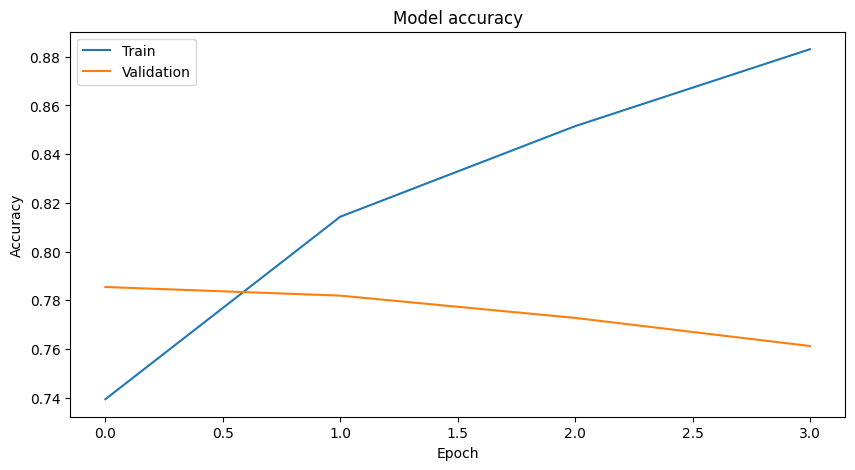

In [21]:
# Assuming 'history' is the variable storing the training history
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

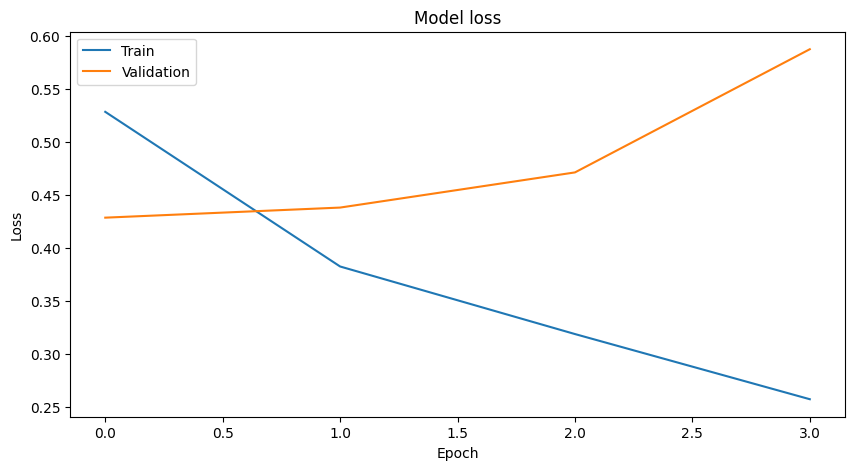

In [22]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

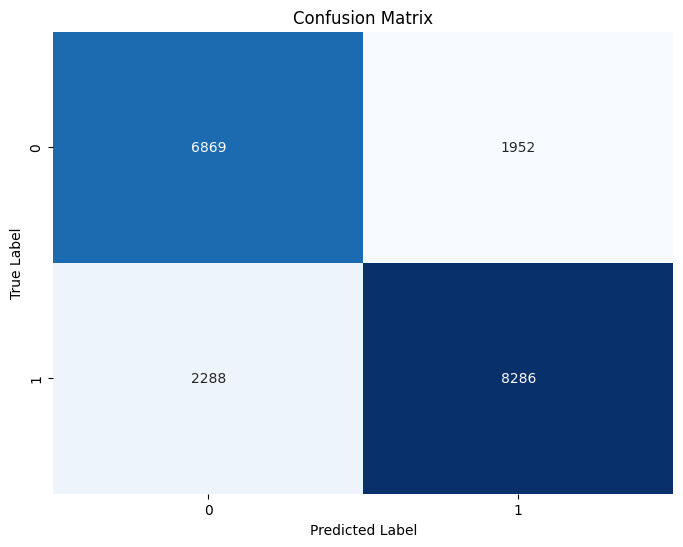

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

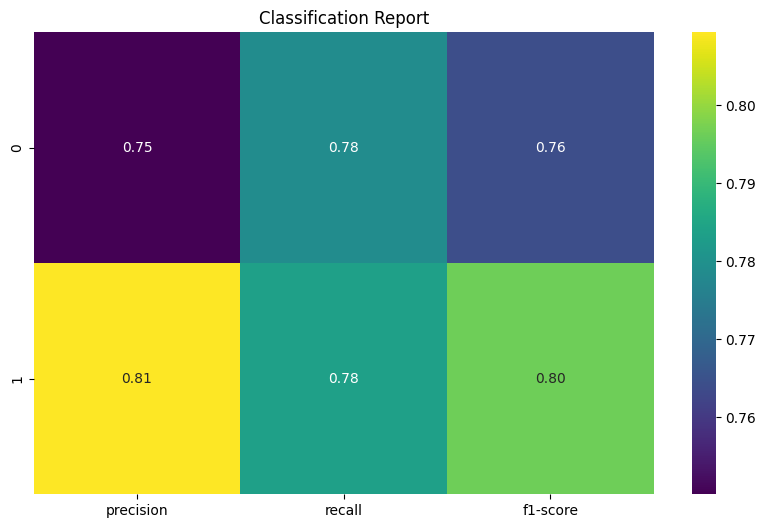

In [24]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [25]:
urdu_model.save(f"CNN_model.keras")

Testing with TRAIN DATASET

In [26]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8105 - loss: 0.4681
Test Loss: 0.454156756401062, Test Accuracy: 0.8208333253860474
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8208333333333333
Precision: 0.7709377236936292
Recall: 0.9073294018534119
F1 Score: 0.8335913312693498


# RNN

In [27]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Conv1D(filters=32, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=2),
        SimpleRNN(100),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5408, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2704, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          13,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,154,621 (15.85 MB)

 Trainable params: 4,154,621 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 592s 305ms/step - accuracy: 0.8371 - loss: 0.3478 - val_accuracy: 0.7976 - val_loss: 0.4039
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 642s 316ms/step - accuracy: 0.8646 - loss: 0.2902 - val_accuracy: 0.7901 - val_loss: 0.4394
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 594s 302ms/step - accuracy: 0.8847 - loss: 0.2451 - val_accuracy: 0.7889 - val_loss: 0.4955
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 649s 315ms/step - accuracy: 0.8979 - loss: 0.2101 - val_accuracy: 0.7841 - val_loss: 0.5364


In [75]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 73s 120ms/step - accuracy: 0.7876 - loss: 0.4314
Test Loss: 0.4198107123374939, Test Accuracy: 0.7942768931388855


In [76]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 71s 117ms/step
Accuracy: 0.7924207269914927
Precision: 0.8140828856485035
Recall: 0.8025345186306033
F1 Score: 0.8082674540432422


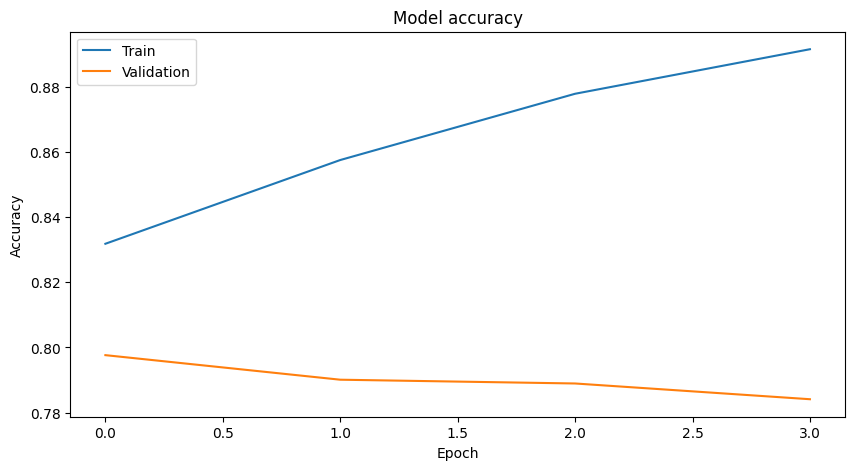

In [77]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

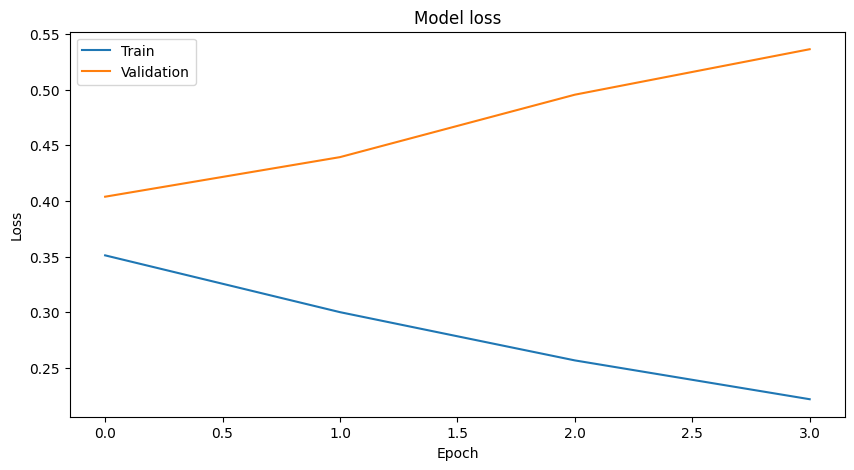

In [78]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

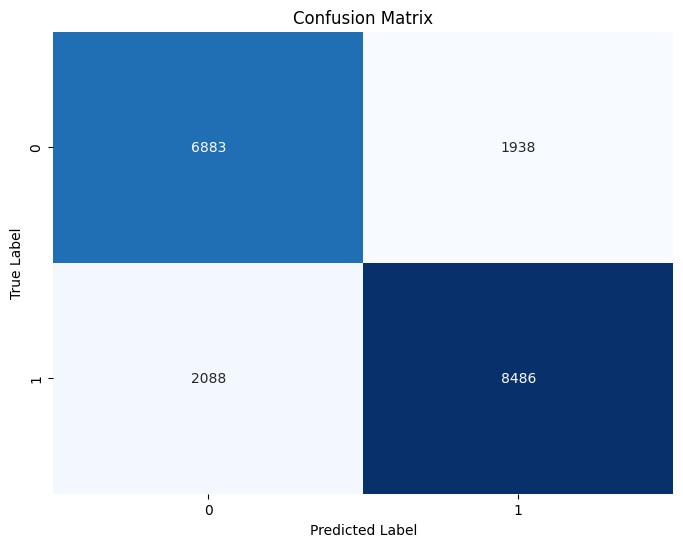

In [79]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

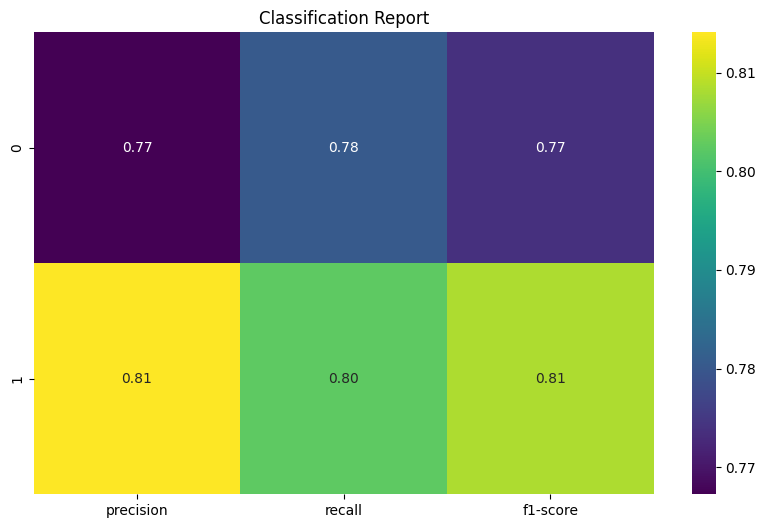

In [80]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [81]:
urdu_model.save(f"RNN_model.keras")

Testing with TRAIN DATASET

In [82]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.8553 - loss: 0.3761
Test Loss: 0.36204245686531067, Test Accuracy: 0.8566666841506958
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step
Accuracy: 0.85875
Precision: 0.8103953147877013
Recall: 0.932603201347936
F1 Score: 0.8672150411280846


# Bi-RNN

In [17]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(SimpleRNN(100)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,162,289 (15.88 MB)

 Trainable params: 4,162,289 (15.88 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 1995s 1s/step - accuracy: 0.5327 - loss: 0.6925 - val_accuracy: 0.5378 - val_loss: 0.6909
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 1996s 1s/step - accuracy: 0.5415 - loss: 0.6882 - val_accuracy: 0.6448 - val_loss: 0.6103
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 1997s 1s/step - accuracy: 0.7011 - loss: 0.5572 - val_accuracy: 0.7706 - val_loss: 0.4618
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 1993s 1s/step - accuracy: 0.8167 - loss: 0.3961 - val_accuracy: 0.7858 - val_loss: 0.4315
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 1991s 1s/step - accuracy: 0.8496 - loss: 0.3327 - val_accuracy: 0.7877 - val_loss: 0.4484
Epoch 6/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2005s 1s/step - accuracy: 0.8688 - loss: 0.2941 - val_accuracy: 0.7820 - val_loss: 0.4500
Epoch 7/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 2004s 1s/step - accuracy: 0.8823 - loss: 0.2666 - val_accuracy: 0.7724 - val_loss: 0.4645


In [29]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 202s 333ms/step - accuracy: 0.7788 - loss: 0.4491
Test Loss: 0.44395408034324646, Test Accuracy: 0.7790667414665222


In [30]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 202s 332ms/step
Accuracy: 0.7790667697860273
Precision: 0.8014571948998178
Recall: 0.7906184982031398
F1 Score: 0.7960009521542489


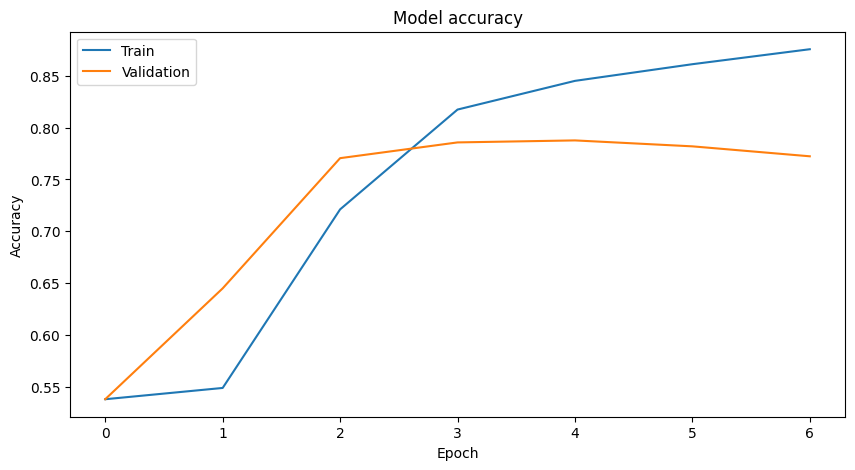

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

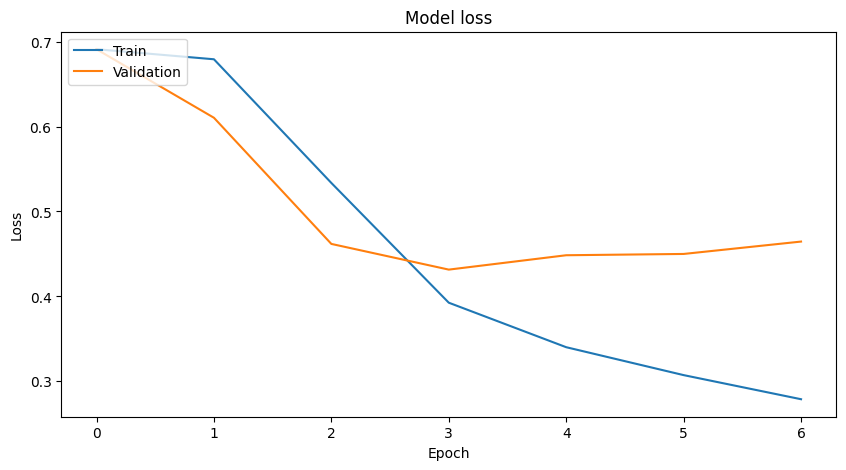

In [32]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

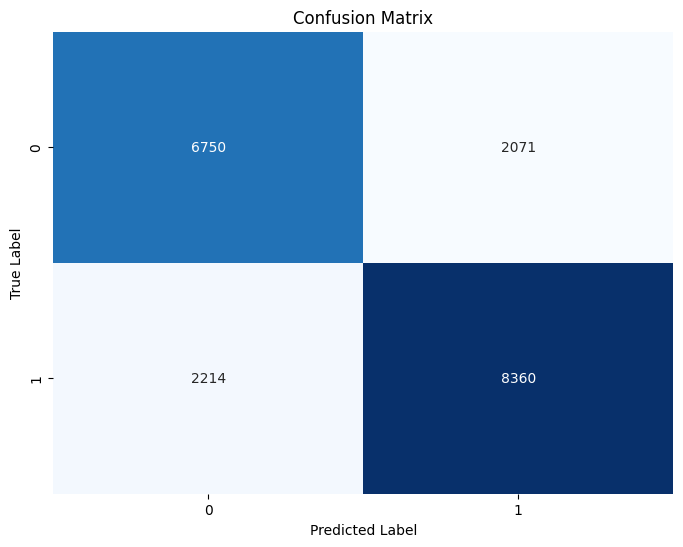

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

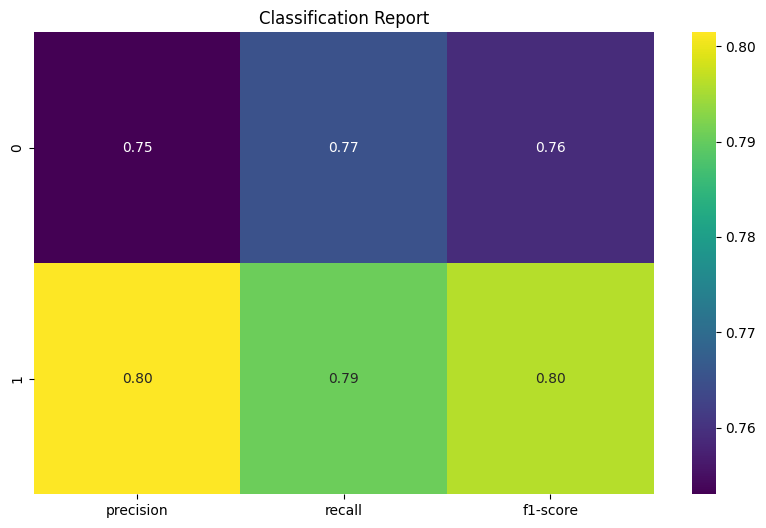

In [34]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [35]:
urdu_model.save(f"Bi-RNN_model.keras")

Testing with TRAIN DATASET

In [36]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step - accuracy: 0.8497 - loss: 0.3882
Test Loss: 0.39029860496520996, Test Accuracy: 0.8433333039283752
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step
Accuracy: 0.8433333333333334
Precision: 0.7853624208304011
Recall: 0.9401853411962932
F1 Score: 0.8558282208588956


# LSTM

In [30]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        LSTM(units=64, dropout=0.2, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,155,625 (15.85 MB)

 Trainable params: 4,155,625 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 339s 171ms/step - accuracy: 0.5409 - loss: 0.6906 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 373s 169ms/step - accuracy: 0.5419 - loss: 0.6897 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 381s 168ms/step - accuracy: 0.5392 - loss: 0.6901 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 383s 169ms/step - accuracy: 0.5378 - loss: 0.6903 - val_accuracy: 0.5378 - val_loss: 0.6903


In [33]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891763806343079, Test Accuracy: 0.5451920628547668


In [34]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351997


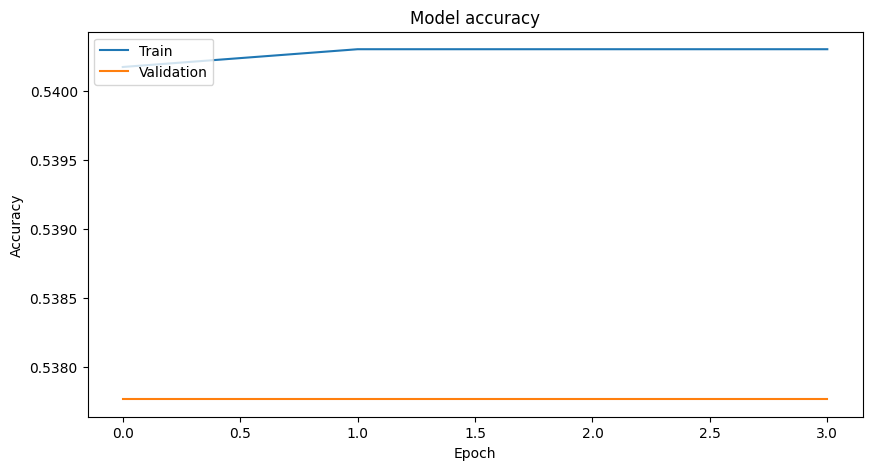

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

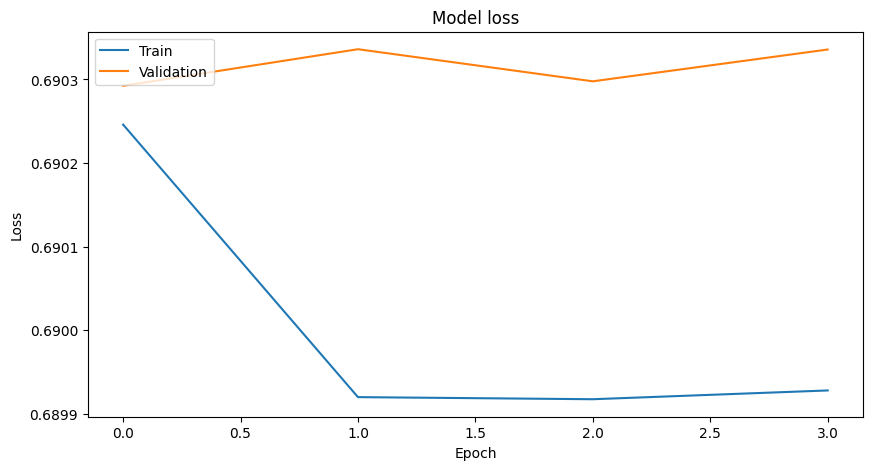

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

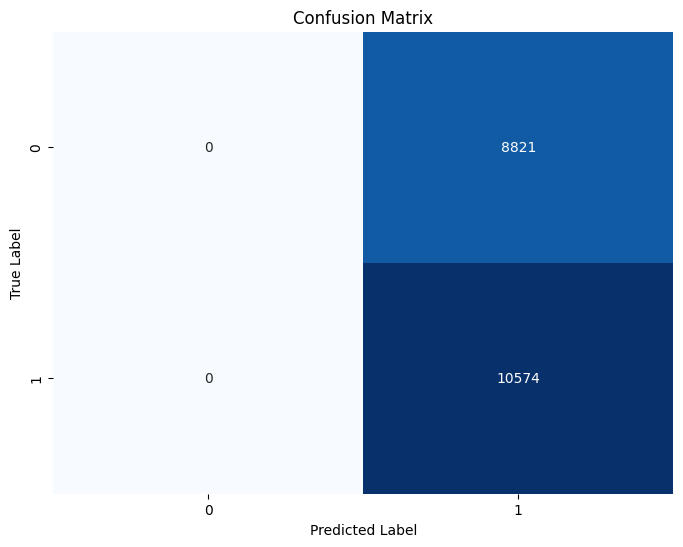

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


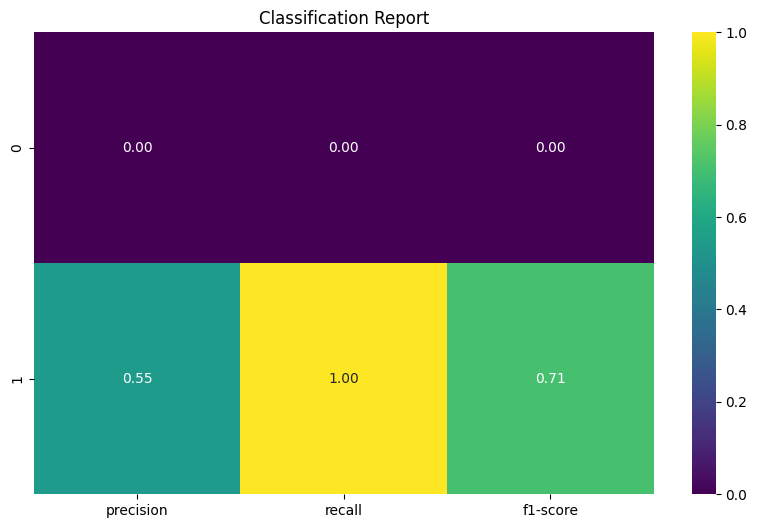

In [38]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [39]:
urdu_model.save(f"LSTM_model.keras")

Testing with TRAIN DATASET

In [40]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.4920 - loss: 0.6972
Test Loss: 0.6967883110046387, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-LSTM

In [41]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,201,961 (16.03 MB)

 Trainable params: 4,201,961 (16.03 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 644s 330ms/step - accuracy: 0.7349 - loss: 0.4946 - val_accuracy: 0.8036 - val_loss: 0.3941
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 677s 328ms/step - accuracy: 0.8381 - loss: 0.3459 - val_accuracy: 0.7998 - val_loss: 0.4014
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 684s 329ms/step - accuracy: 0.8645 - loss: 0.2894 - val_accuracy: 0.7906 - val_loss: 0.4397
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 662s 319ms/step - accuracy: 0.8858 - loss: 0.2420 - val_accuracy: 0.7889 - val_loss: 0.5150


In [44]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 76s 125ms/step - accuracy: 0.7939 - loss: 0.4118
Test Loss: 0.40591487288475037, Test Accuracy: 0.7959783673286438


In [45]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 75s 123ms/step
Accuracy: 0.7946893529260118
Precision: 0.8504891535516801
Recall: 0.7563835823718555
F1 Score: 0.8006807488237061


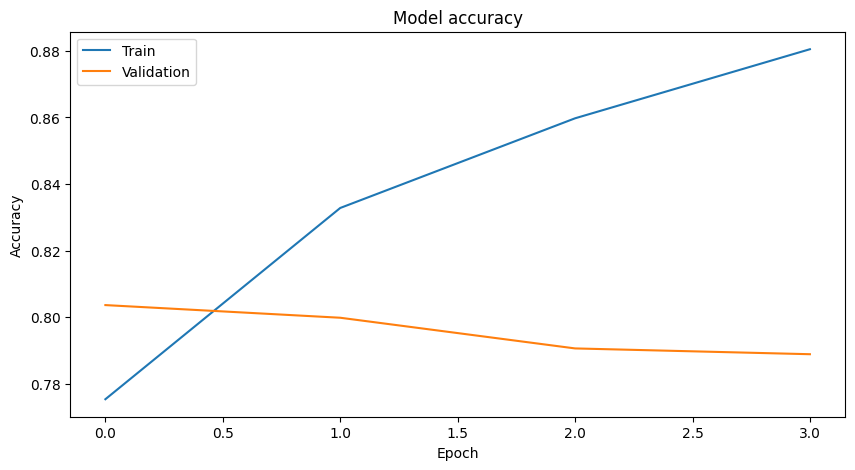

In [46]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

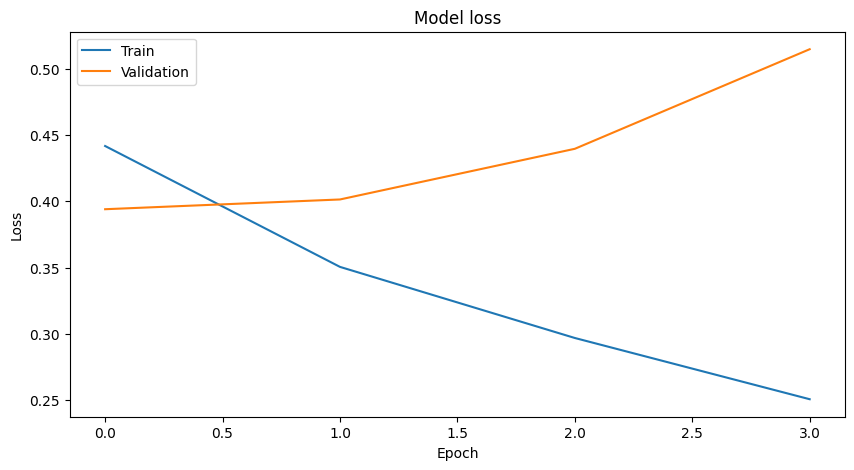

In [47]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

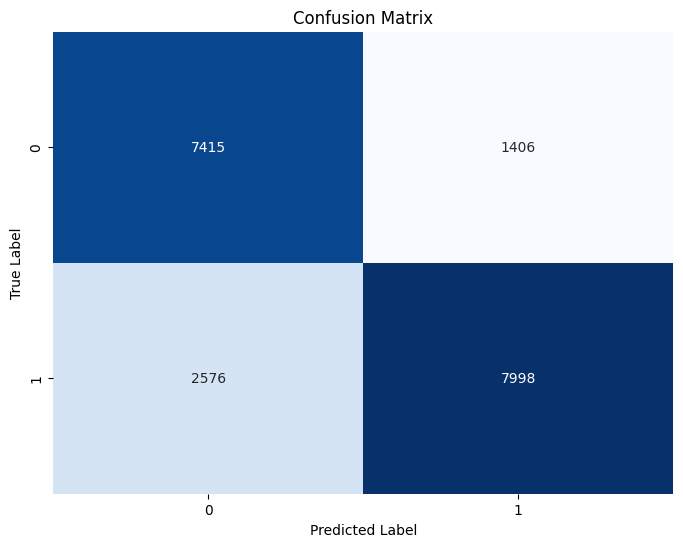

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

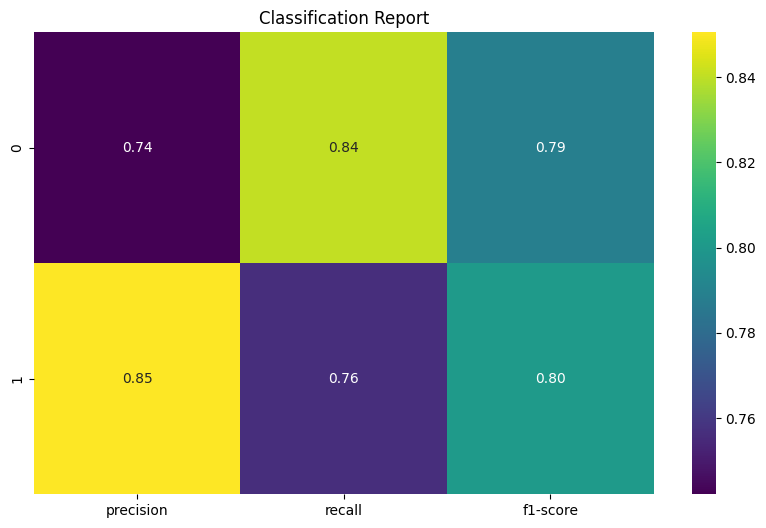

In [49]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [50]:
urdu_model.save(f"Bi-LSTM_model.keras")

Testing with TRAIN DATASET

In [51]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8460 - loss: 0.3830
Test Loss: 0.37990498542785645, Test Accuracy: 0.8475000262260437
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step
Accuracy: 0.8495833333333334
Precision: 0.8162327718223583
Recall: 0.8980623420387531
F1 Score: 0.8551945447252306


# GRU

In [52]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          31,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,145,257 (15.81 MB)

 Trainable params: 4,145,257 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 316s 162ms/step - accuracy: 0.5357 - loss: 0.6911 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 335s 169ms/step - accuracy: 0.5436 - loss: 0.6894 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 380s 168ms/step - accuracy: 0.5431 - loss: 0.6895 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 366s 160ms/step - accuracy: 0.5405 - loss: 0.6899 - val_accuracy: 0.5378 - val_loss: 0.6903
Epoch 5/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 334s 166ms/step - accuracy: 0.5400 - loss: 0.6900 - val_accuracy: 0.5378 - val_loss: 0.6903


In [55]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.5424 - loss: 0.6896
Test Loss: 0.6891247630119324, Test Accuracy: 0.5451920628547668


In [56]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step
Accuracy: 0.5451920598092291
Precision: 0.5451920598092291
Recall: 1.0
F1 Score: 0.7056625179351997


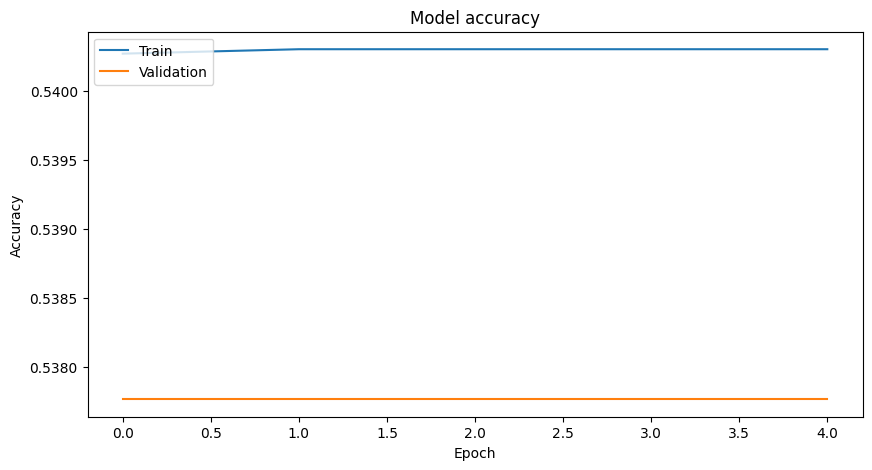

In [57]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

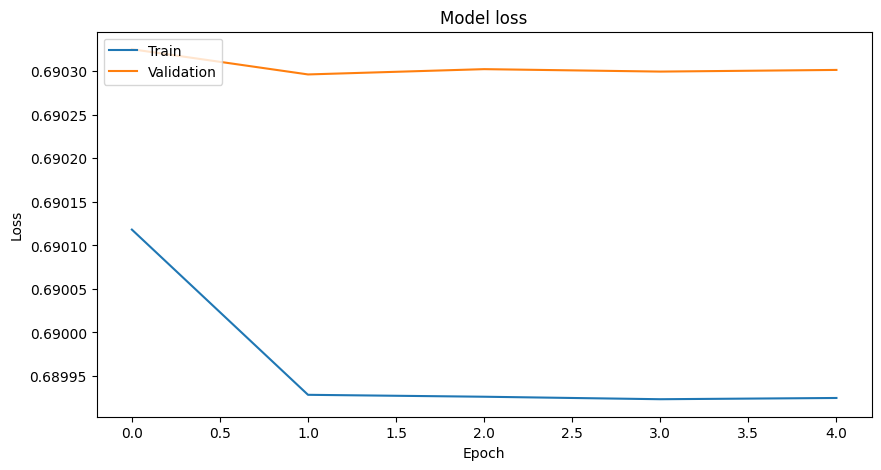

In [58]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

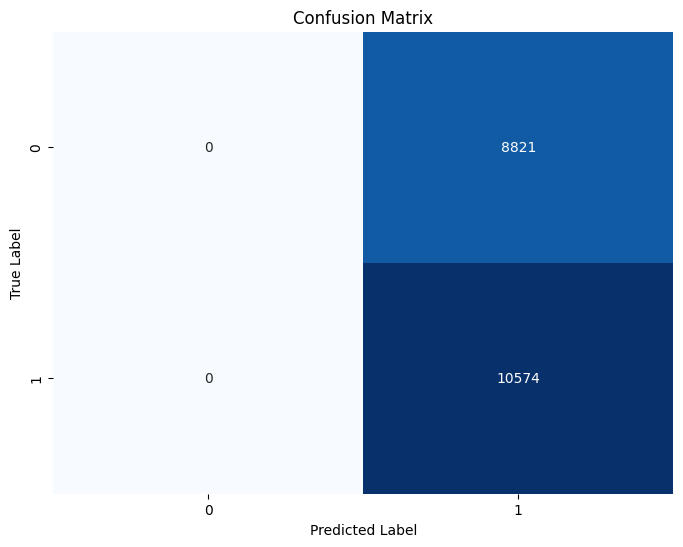

In [59]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


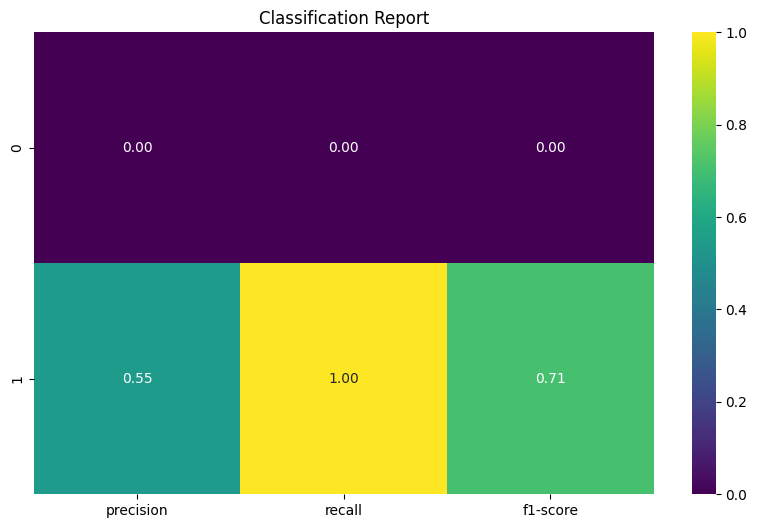

In [60]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [61]:
urdu_model.save(f"GRU_model.keras")

Testing with TRAIN DATASET

In [62]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4920 - loss: 0.6975
Test Loss: 0.6971135139465332, Test Accuracy: 0.4945833384990692
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step
Accuracy: 0.4945833333333333
Precision: 0.4945833333333333
Recall: 1.0
F1 Score: 0.6618344020072484


# Bi-GRU

In [63]:
# Define LSTM Model
def build_model(embedding_matrix):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True, input_length=maxlen),
        Bidirectional(GRU(units=64, dropout=0.2, recurrent_dropout=0.0, return_sequences=False)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.build((None, maxlen))  # Build the model with input shape
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [64]:
# Build and Train Model
urdu_model = build_model(fastext_embedding_matrix)
urdu_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 5415, 100)           │       4,106,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          63,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,181,225 (15.95 MB)

 Trainable params: 4,181,225 (15.95 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = urdu_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 619s 317ms/step - accuracy: 0.7290 - loss: 0.5008 - val_accuracy: 0.8010 - val_loss: 0.4023
Epoch 2/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 612s 315ms/step - accuracy: 0.8393 - loss: 0.3427 - val_accuracy: 0.7984 - val_loss: 0.4080
Epoch 3/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 625s 317ms/step - accuracy: 0.8676 - loss: 0.2876 - val_accuracy: 0.7931 - val_loss: 0.4311
Epoch 4/500
1940/1940 ━━━━━━━━━━━━━━━━━━━━ 626s 319ms/step - accuracy: 0.8844 - loss: 0.2442 - val_accuracy: 0.7899 - val_loss: 0.4811


In [66]:
# Evaluate Model
eval_results = urdu_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

607/607 ━━━━━━━━━━━━━━━━━━━━ 75s 124ms/step - accuracy: 0.7922 - loss: 0.4229
Test Loss: 0.41391441226005554, Test Accuracy: 0.7944831252098083


In [67]:
# Predictions and Metrics
y_pred = (urdu_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

607/607 ━━━━━━━━━━━━━━━━━━━━ 73s 120ms/step
Accuracy: 0.7948440319670018
Precision: 0.8231892580613545
Recall: 0.7943067902402119
F1 Score: 0.8084901573855706


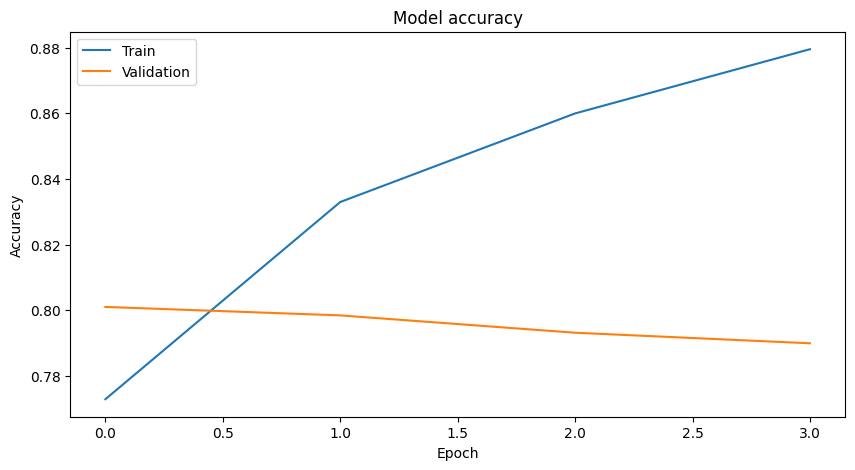

In [68]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

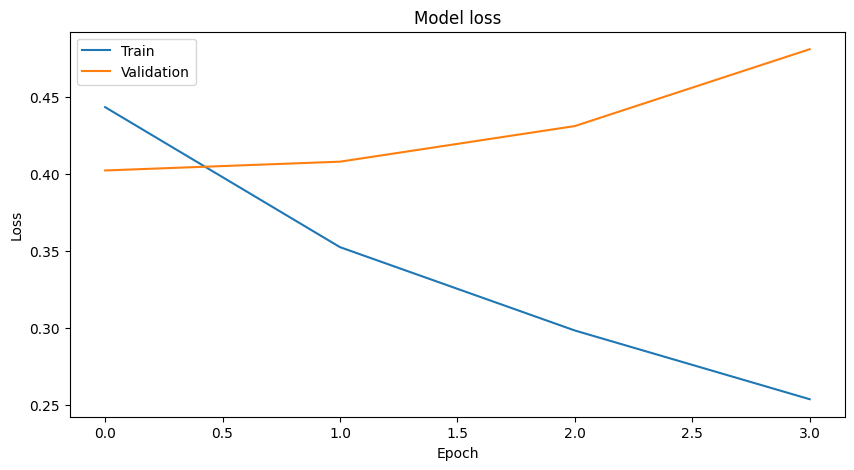

In [69]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

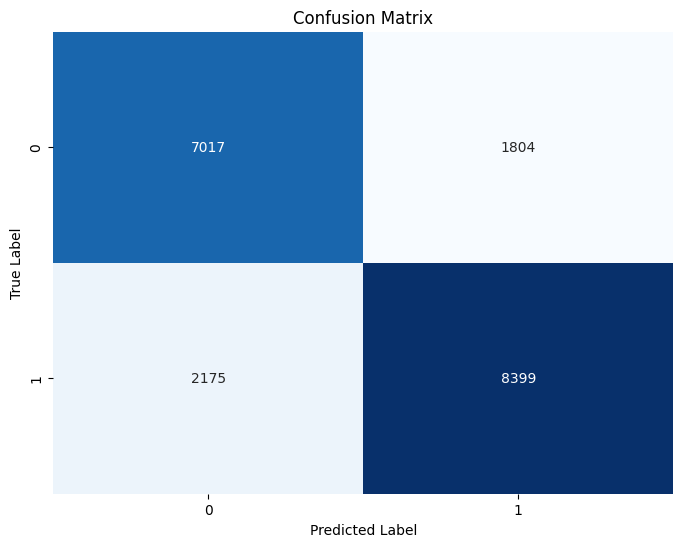

In [70]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

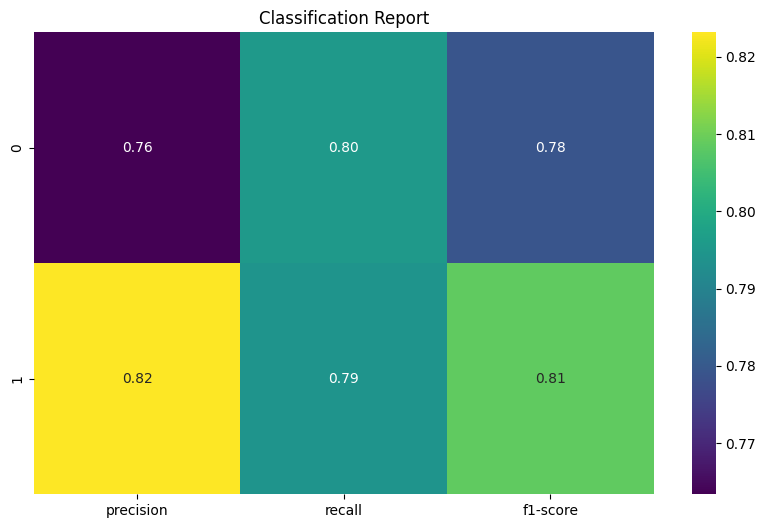

In [71]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[:-3].drop(columns=['support']), annot=True, cmap='viridis', fmt=".2f")  # Exclude support and averages
plt.title('Classification Report')
plt.show()

In [72]:
urdu_model.save(f"Bi-GRU_model.keras")

Testing with TRAIN DATASET

In [73]:
# Evaluate Model
eval_results = urdu_model.evaluate(xx_test, yy_test)
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")
# Predictions and Metrics
y_pred = (urdu_model.predict(xx_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(yy_test, y_pred))
print("Precision:", precision_score(yy_test, y_pred))
print("Recall:", recall_score(yy_test, y_pred))
print("F1 Score:", f1_score(yy_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.8364 - loss: 0.4430
Test Loss: 0.43455806374549866, Test Accuracy: 0.8399999737739563
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step
Accuracy: 0.8433333333333334
Precision: 0.7970695970695971
Recall: 0.9165964616680707
F1 Score: 0.8526645768025078
